In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from joblib import dump
from joblib import load
import matplotlib.pyplot as plt

In [ ]:
try:
  drive.mount('/content/drive', force_remount=True)
except PermissionError:
  print("Permission error occurred, rerun the code to grant permission.")
  raise

Mounted at /content/drive


In [ ]:
# df1 for ORIGINAL SLATM

folder_path = "/content/drive/My Drive/current_05_08/slatm_original_v2/"

thermo_data = pd.read_csv('/content/drive/My Drive/total_therm_1250_new.csv', header=0)
slatm_vectors = []

for i in range(thermo_data.shape[0]):
  filename = f'{folder_path}traj{i}_slatm_s1_80.txt'
  vector = np.loadtxt(filename)
  vector = vector.reshape(1, -1)
  slatm_vectors.append(vector)

slatm_vectors = np.vstack(slatm_vectors)

thermo_properties = thermo_data.values

data = np.hstack((slatm_vectors, thermo_properties))

slatm_columns = [f'slatm_{i}' for i in range (1, 261)]
thermo_columns = ['density', 'avg_temp', 'pressure']
columns = slatm_columns + thermo_columns

df1 = pd.DataFrame(data, columns=columns)

df1.to_csv('s1_data_with_features.csv', index=False)

In [ ]:
# splitting the data df1

X = df1.drop(['density', 'avg_temp', 'pressure'], axis=1)
y = df1[['density', 'avg_temp', 'pressure']]

X_train_s1, X_test_s1, y_train_s1, y_test_s1 = train_test_split(X, y, train_size=1110, random_state=42)

In [ ]:
# df2 for YUKAWA SLATM
folder_path = "/content/drive/My Drive/current_05_08/slatm_yukawa_L1_main/"

thermo_data = pd.read_csv('/content/drive/My Drive/total_therm_1250_new.csv', header=0)
slatm_vectors = []

for i in range(thermo_data.shape[0]):
  filename = f'{folder_path}traj{i}-slatm-v3-yukawa.txt.txt'
  vector = np.loadtxt(filename)
  vector = vector.reshape(1, -1)
  slatm_vectors.append(vector)

slatm_vectors = np.vstack(slatm_vectors)

thermo_properties = thermo_data.values

data = np.hstack((slatm_vectors, thermo_properties))

slatm_columns = [f'slatm_{i}' for i in range (1, 261)]
thermo_columns = ['density', 'avg_temp', 'pressure']
columns = slatm_columns + thermo_columns

df3 = pd.DataFrame(data, columns=columns)

df3.to_csv('s3_data_with_features.csv', index=False)


In [ ]:
# splitting the data df2

X = df3.drop(['density', 'avg_temp', 'pressure'], axis=1)
y = df3[['density', 'avg_temp', 'pressure']]

X_train_s3, X_test_s3, y_train_s3, y_test_s3 = train_test_split(X, y, train_size=1110, random_state=42)

In [ ]:
# df3 for PBCS SLATM
folder_path = "/content/drive/My Drive/current_05_08/slatm_pbcs/"

thermo_data = pd.read_csv('/content/drive/My Drive/total_therm_1250_new.csv', header=0)
slatm_vectors = []

for i in range(thermo_data.shape[0]):
  filename = f'{folder_path}traj{i}-slatm-v2-pbcs.txt'
  vector = np.loadtxt(filename)
  vector = vector.reshape(1, -1)
  slatm_vectors.append(vector)

slatm_vectors = np.vstack(slatm_vectors)

thermo_properties = thermo_data.values

data = np.hstack((slatm_vectors, thermo_properties))

slatm_columns = [f'slatm_{i}' for i in range (1, 261)]
thermo_columns = ['density', 'avg_temp', 'pressure']
columns = slatm_columns + thermo_columns

df2 = pd.DataFrame(data, columns=columns)

df2.to_csv('data_with_features.csv', index=False)


In [ ]:
# splitting the data df3, which is slatm2, s2

X = df2.drop(['density', 'avg_temp', 'pressure'], axis=1)
y = df2[['density', 'avg_temp', 'pressure']]

X_train_s2, X_test_s2, y_train_s2, y_test_s2 = train_test_split(X, y, train_size=1110, random_state=42)

### LAPLACIAN KERNEL TRIAL

In [ ]:
# laplacian kernel s1

model_krr_lap = KernelRidge(kernel='laplacian', alpha=0.01, gamma=1e-4)
trained_model_lap_s1 = model_krr_lap.fit(X_train_s1, y_train_s1)
y_pred_s1 = model_krr_lap.predict(X_test_s1)

mse = mean_squared_error(y_test_s1, y_pred_s1)
mae = mean_absolute_error(y_test_s1, y_pred_s1)
r2 = r2_score(y_test_s1, y_pred_s1)

# grid search for s1

param_grid = {'alpha': np.logspace(-11, 1, num=10), 'gamma': np.logspace(-19, -1, num=10)}
model_krr_lap = KernelRidge(kernel='laplacian')
grid_search = GridSearchCV(model_krr_lap, param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_s1, y_train_s1)
best_model_s1 = grid_search.best_estimator_
y_pred_s1 = best_model_s1.predict(X_test_s1)

mse = mean_squared_error(y_test_s1, y_pred_s1)
mae = mean_absolute_error(y_test_s1, y_pred_s1)
r2 = r2_score(y_test_s1, y_pred_s1)

print("best parameters for s1:", grid_search.best_params_)

# laplacian kernel s2

model_krr_lap = KernelRidge(kernel='laplacian', alpha=0.01, gamma=1e-4)
trained_model_lap_s2 = model_krr_lap.fit(X_train_s2, y_train_s2)
y_pred_s2 = model_krr_lap.predict(X_test_s2)

mse = mean_squared_error(y_test_s2, y_pred_s2)
mae = mean_absolute_error(y_test_s2, y_pred_s2)
r2 = r2_score(y_test_s2, y_pred_s2)

# grid search for s3

param_grid = {'alpha': np.logspace(-11, 1, num=10), 'gamma': np.logspace(-20, -1, num=10)}
model_krr_lap = KernelRidge(kernel='laplacian')
grid_search = GridSearchCV(model_krr_lap, param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_s2, y_train_s2)
best_model_s2 = grid_search.best_estimator_
y_pred_s2 = best_model_s2.predict(X_test_s2)

mse = mean_squared_error(y_test_s2, y_pred_s2)
mae = mean_absolute_error(y_test_s2, y_pred_s2)
r2 = r2_score(y_test_s2, y_pred_s2)

print("best parameters for s3:", grid_search.best_params_)

# laplacian kernel s3

model_krr_lap = KernelRidge(kernel='laplacian', alpha=0.01, gamma=1e-4)
trained_model_lap_s3 = model_krr_lap.fit(X_train_s3, y_train_s3)
y_pred_s3 = model_krr_lap.predict(X_test_s3)

mse = mean_squared_error(y_test_s3, y_pred_s3)
mae = mean_absolute_error(y_test_s3, y_pred_s3)
r2 = r2_score(y_test_s3, y_pred_s3)

# grid search for s3

param_grid = {'alpha': np.logspace(-11, 1, num=10), 'gamma': np.logspace(-20, -1, num=10)}
model_krr_lap = KernelRidge(kernel='laplacian')
grid_search = GridSearchCV(model_krr_lap, param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_s3, y_train_s3)
best_model_s3 = grid_search.best_estimator_
y_pred_s3 = best_model_s3.predict(X_test_s3)

mse = mean_squared_error(y_test_s3, y_pred_s3)
mae = mean_absolute_error(y_test_s3, y_pred_s3)
r2 = r2_score(y_test_s3, y_pred_s3)

print("best parameters for s3:", grid_search.best_params_)

best parameters for s1: {'alpha': 4.641588833612772e-05, 'gamma': 1e-05}
best parameters for s3: {'alpha': 0.021544346900318777, 'gamma': 0.0007742636826811277}
best parameters for s3: {'alpha': 4.641588833612773e-09, 'gamma': 3.593813663804626e-10}


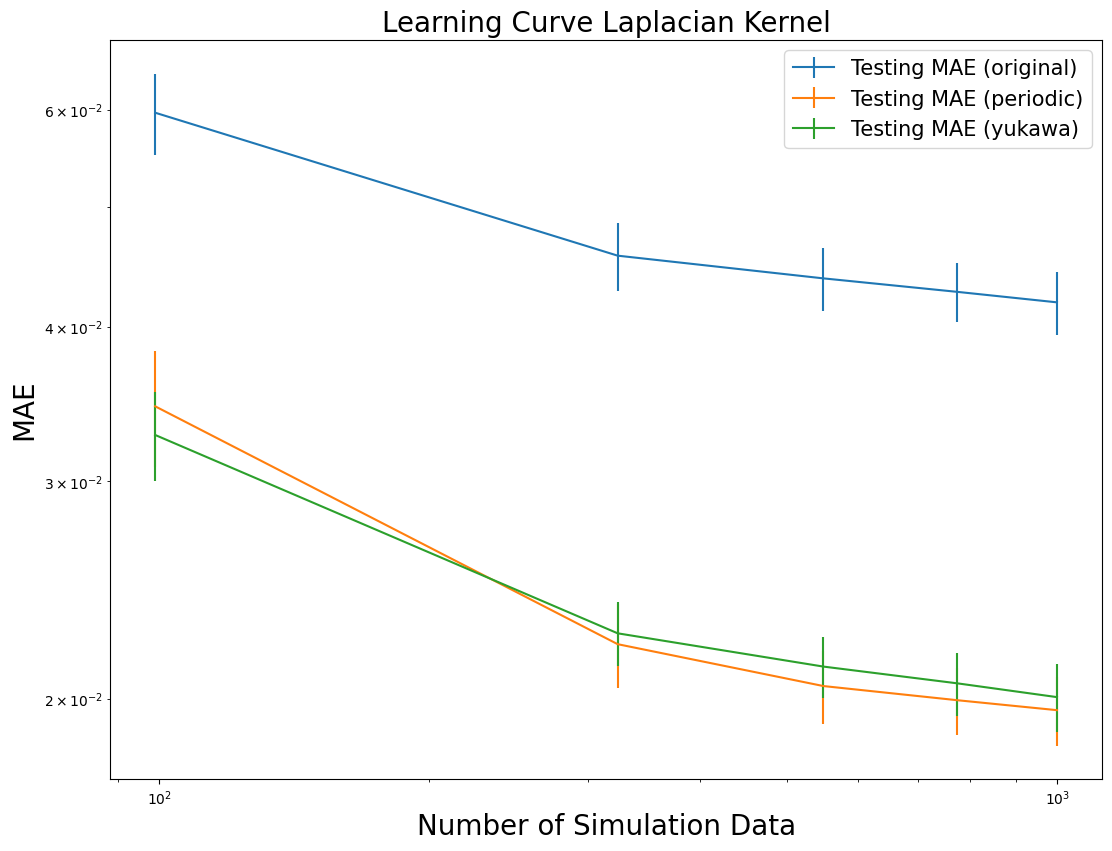

In [ ]:
# laplacian learning curve with error

train_sizes_s1, train_scores_s1, test_scores_s1 = learning_curve(best_model_s1, X_train_s1, y_train_s1, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

train_mae_s1 = -train_scores_s1
test_mae_s1 = -test_scores_s1

train_mae_mean_s1 = np.mean(train_mae_s1, axis=1)
train_mae_std_s1 = np.std(train_mae_s1, axis=1)
test_mae_mean_s1 = np.mean(test_mae_s1, axis=1)
test_mae_std_s1 = np.std(test_mae_s1, axis=1)

train_sizes_s2, train_scores_s2, test_scores_s2 = learning_curve(best_model_s2, X_train_s2, y_train_s2, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

train_mae_s2 = -train_scores_s2
test_mae_s2 = -test_scores_s2

train_mae_mean_s2 = np.mean(train_mae_s2, axis=1)
train_mae_std_s2 = np.std(train_mae_s2, axis=1)
test_mae_mean_s2 = np.mean(test_mae_s2, axis=1)
test_mae_std_s2 = np.std(test_mae_s2, axis=1)

train_sizes_s3, train_scores_s3, test_scores_s3 = learning_curve(best_model_s3, X_train_s3, y_train_s3, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

train_mae_s3 = -train_scores_s3
test_mae_s3 = -test_scores_s3

train_mae_mean_s3 = np.mean(train_mae_s3, axis=1)
train_mae_std_s3 = np.std(train_mae_s3, axis=1)
test_mae_mean_s3 = np.mean(test_mae_s3, axis=1)
test_mae_std_s3 = np.std(test_mae_s3, axis=1)

plt.figure(figsize=(12.8, 9.6))

plt.errorbar(train_sizes_s1, test_mae_mean_s1, yerr=test_mae_std_s1, label='Testing MAE (original)')
plt.errorbar(train_sizes_s2, test_mae_mean_s2, yerr=test_mae_std_s2, label='Testing MAE (periodic)')
plt.errorbar(train_sizes_s3, test_mae_mean_s3, yerr=test_mae_std_s3, label='Testing MAE (yukawa)')

plt.yscale("log")
plt.xscale("log")
plt.xlabel('Number of Simulation Data', fontsize='20')
plt.ylabel('MAE', fontsize='20')
plt.title('Learning Curve Laplacian Kernel', fontsize='20')
plt.legend(fontsize='15')

plt.show()

### RBF KERNEL

In [ ]:
# rbf kernel s1
model_krr_rbf = KernelRidge(kernel='rbf', alpha=1e-9, gamma=1e-7)
trained_model_rbf_s1 = model_krr_rbf.fit(X_train_s1, y_train_s1)
y_pred_s1_old = model_krr_rbf.predict(X_test_s1)

mse = mean_squared_error(y_test_s1, y_pred_s1_old)
mae = mean_absolute_error(y_test_s1, y_pred_s1_old)
r2 = r2_score(y_test_s1, y_pred_s1_old)

# grid search for s1

param_grid = {'alpha': np.logspace(-11, 1, num=10), 'gamma': np.logspace(-19, -1, num=10)}
model_krr_rbf = KernelRidge(kernel='rbf')
grid_search = GridSearchCV(model_krr_rbf, param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_s1, y_train_s1)
best_model_s1 = grid_search.best_estimator_
y_pred_s1 = best_model_s1.predict(X_test_s1)

mse = mean_squared_error(y_test_s1, y_pred_s1)
mae = mean_absolute_error(y_test_s1, y_pred_s1)
r2 = r2_score(y_test_s1, y_pred_s1)

print("best parameters for s1:", grid_search.best_params_)

best parameters for s1: {'alpha': 4.641588833612773e-09, 'gamma': 1e-05}


In [ ]:
# rbf kernel s2
model_krr_rbf = KernelRidge(kernel='rbf', alpha=1e-9, gamma=1e-7)
trained_model_rbf_s2 = model_krr_rbf.fit(X_train_s2, y_train_s2)
y_pred_s2_old = model_krr_rbf.predict(X_test_s2)

mse = mean_squared_error(y_test_s2, y_pred_s2_old)
mae = mean_absolute_error(y_test_s2, y_pred_s2_old)
r2 = r2_score(y_test_s2, y_pred_s2_old)

# grid search for s2

param_grid = {'alpha': np.logspace(-11, 1, num=10), 'gamma': np.logspace(-19, -1, num=10)}
model_krr_rbf = KernelRidge(kernel='rbf')
grid_search = GridSearchCV(model_krr_rbf, param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_s2, y_train_s2)
best_model_s2 = grid_search.best_estimator_
y_pred_s2 = best_model_s2.predict(X_test_s2)

mse = mean_squared_error(y_test_s2, y_pred_s2)
mae = mean_absolute_error(y_test_s2, y_pred_s2)
r2 = r2_score(y_test_s2, y_pred_s2)

print("best parameters for s2:", grid_search.best_params_)

best parameters for s2: {'alpha': 4.641588833612772e-05, 'gamma': 1e-05}


In [ ]:
# rbf kernel s3
model_krr_rbf = KernelRidge(kernel='rbf', alpha=1e-9, gamma=1e-7)
trained_model_rbf_s3 = model_krr_rbf.fit(X_train_s3, y_train_s3)
y_pred_s3_old = model_krr_rbf.predict(X_test_s3)

mse = mean_squared_error(y_test_s3, y_pred_s3_old)
mae = mean_absolute_error(y_test_s3, y_pred_s3_old)
r2 = r2_score(y_test_s3, y_pred_s3_old)

# grid search for s3

param_grid = {'alpha': np.logspace(-11, 1, num=10), 'gamma': np.logspace(-20, -1, num=10)}
model_krr_rbf = KernelRidge(kernel='rbf')
grid_search = GridSearchCV(model_krr_rbf, param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_s3, y_train_s3)
best_model_s3 = grid_search.best_estimator_
y_pred_s3 = best_model_s3.predict(X_test_s3)

mse = mean_squared_error(y_test_s3, y_pred_s3)
mae = mean_absolute_error(y_test_s3, y_pred_s3)
r2 = r2_score(y_test_s3, y_pred_s3)

print("best parameters for s3:", grid_search.best_params_)

best parameters for s3: {'alpha': 4.641588833612772e-05, 'gamma': 5.9948425031894214e-06}


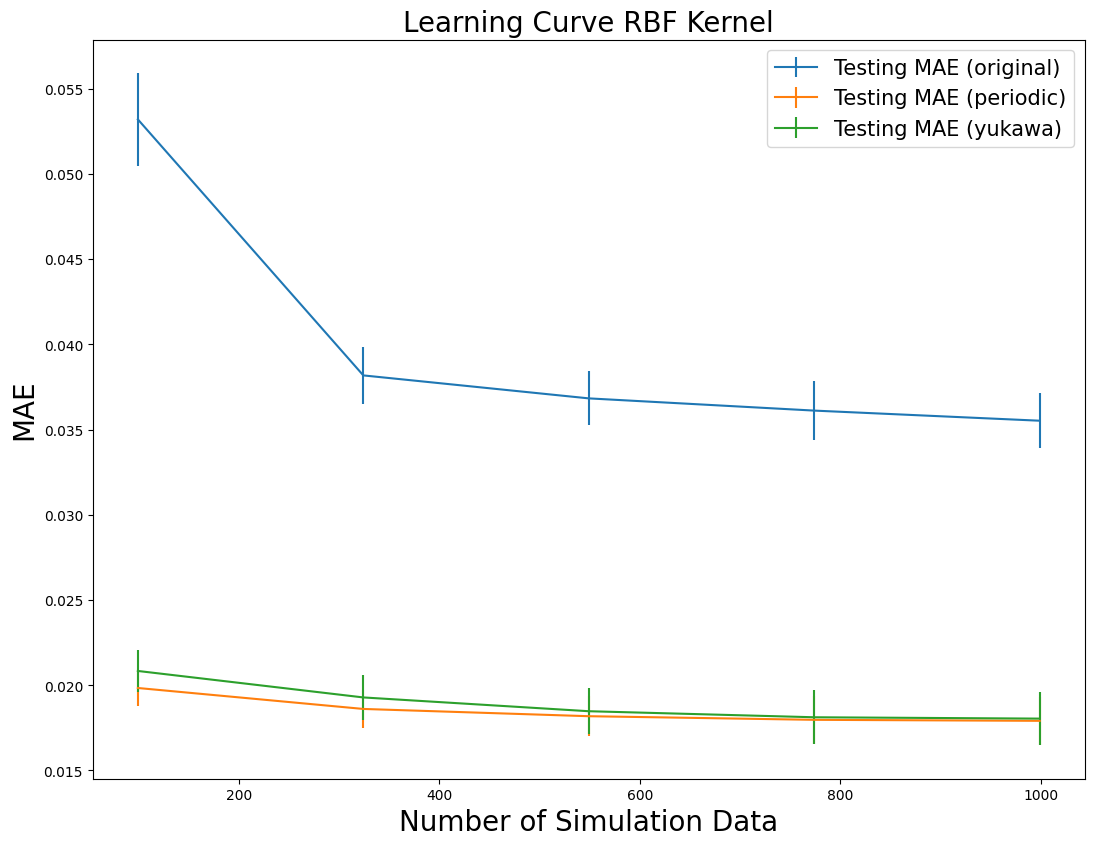

In [ ]:
# learning curve with error

train_sizes_s1, train_scores_s1, test_scores_s1 = learning_curve(best_model_s1, X_train_s1, y_train_s1, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

train_mae_s1 = -train_scores_s1
test_mae_s1 = -test_scores_s1

train_mae_mean_s1 = np.mean(train_mae_s1, axis=1)
train_mae_std_s1 = np.std(train_mae_s1, axis=1)
test_mae_mean_s1 = np.mean(test_mae_s1, axis=1)
test_mae_std_s1 = np.std(test_mae_s1, axis=1)

train_sizes_s2, train_scores_s2, test_scores_s2 = learning_curve(best_model_s2, X_train_s2, y_train_s2, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

train_mae_s2 = -train_scores_s2
test_mae_s2 = -test_scores_s2

train_mae_mean_s2 = np.mean(train_mae_s2, axis=1)
train_mae_std_s2 = np.std(train_mae_s2, axis=1)
test_mae_mean_s2 = np.mean(test_mae_s2, axis=1)
test_mae_std_s2 = np.std(test_mae_s2, axis=1)

train_sizes_s3, train_scores_s3, test_scores_s3 = learning_curve(best_model_s3, X_train_s3, y_train_s3, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

train_mae_s3 = -train_scores_s3
test_mae_s3 = -test_scores_s3

train_mae_mean_s3 = np.mean(train_mae_s3, axis=1)
train_mae_std_s3 = np.std(train_mae_s3, axis=1)
test_mae_mean_s3 = np.mean(test_mae_s3, axis=1)
test_mae_std_s3 = np.std(test_mae_s3, axis=1)

plt.figure(figsize=(12.8, 9.6))

plt.errorbar(train_sizes_s1, test_mae_mean_s1, yerr=test_mae_std_s1, label='Testing MAE (original)')
plt.errorbar(train_sizes_s2, test_mae_mean_s2, yerr=test_mae_std_s2, label='Testing MAE (periodic)')
plt.errorbar(train_sizes_s3, test_mae_mean_s3, yerr=test_mae_std_s3, label='Testing MAE (yukawa)')

plt.xlabel('Number of Simulation Data', fontsize='20')
plt.ylabel('MAE', fontsize='20')
plt.title('Learning Curve RBF Kernel', fontsize='20')
plt.legend(fontsize='15')

plt.show()

In [ ]:
#create .csv from predicted values for further analysis

predicted_data = pd.DataFrame(y_pred_s1, columns=['predicted_density', 'predicted_avg_temp', 'predicted_avg_pressure', 'predicted_avg_harm_pressure'])
predicted_data.to_csv('/content/drive/My Drive/predicted_new_values_s1.csv', index=False)

predicted_data = pd.DataFrame(y_pred_s2, columns=['predicted_density', 'predicted_avg_temp', 'predicted_avg_pressure', 'predicted_avg_harm_pressure'])
predicted_data.to_csv('/content/drive/My Drive/predicted_new_values_s2.csv', index=False)

predicted_data = pd.DataFrame(y_pred_s3, columns=['predicted_density', 'predicted_avg_temp', 'predicted_avg_pressure', 'predicted_avg_harm_pressure'])
predicted_data.to_csv('/content/drive/My Drive/predicted_new_values_s3.csv', index=False)